# Population of India

## Making a code that gives population data using the growth rate and initial population.

### - Import required packages

In [1]:
import csv as csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### - Read the csv file and load data into empty arrays

In [2]:
year_raw = []
rate_raw = []

with open('pop-india.csv', newline = '') as csvfile:
    data = csv.reader(csvfile)
    next(data)   # skip header
    for row in data:
        year_raw.append(row[0])
        rate_raw.append(row[1])

year = []        
rate = []

for i in range(len(rate_raw)):
    year.append(int(year_raw[i]))
    rate.append(float(rate_raw[i]))

### - Population for each year

* Using the population data from an archieved [article](https://web.archive.org/web/20081219073658/http://indiabudget.nic.in/es2006-07/chapt2007/tab97.pdf) by the Ministry of Finance, Government of India, we take the population of India in the year 1961 as approximately 439 million.

* This initial value is employed to calculate the approximate population for the year range using the growth rate data.

In [3]:
population = [439235000]

for i in range(len(year)-1):
    population.append(round(population[i] + population[i] * rate[i] * 0.01))
    
population_billion = [i * 1e-9 for i in population]

### - Visualizing the population data

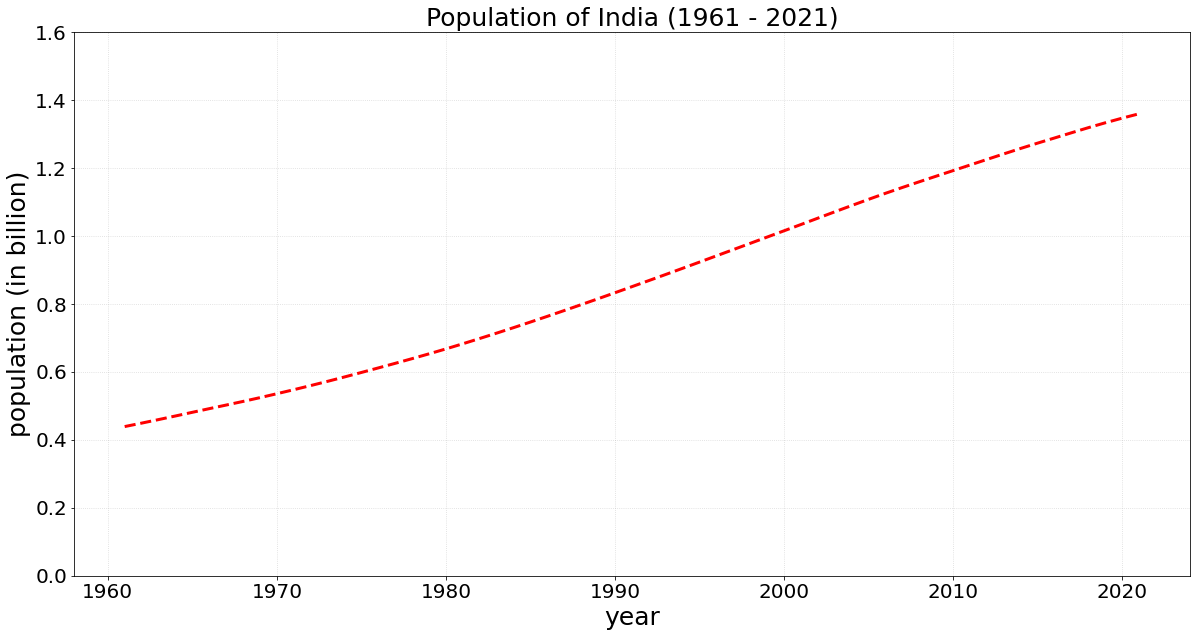

In [4]:
fig = plt.figure(figsize = (20,10))
plt.plot(year, population_billion, linewidth = 3, linestyle = "--", color = "#ff0000")
plt.title('Population of India (1961 - 2021)', fontsize = 25)
plt.ylim(0, 1.6)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('year', fontsize = 25)
plt.ylabel('population (in billion)', fontsize = 25)
plt.grid(True, 'both', linestyle = ':', alpha = 0.5)

### - Save data as ```.csv``` file

In [5]:
yr = np.asarray(year)
pop = np.asarray(population)

df = pd.DataFrame({"year" : yr, "population" : pop})
df.to_csv("population_cleaned.csv", index=False)